# Prodigy Infotech Task-4

#### Dataset : Twitter Sentiment Analysis  

Dataset Details : I had downloaded the data from kaggle website (https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis).

Overview of dataset : This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

Here I have two type of  datasets such as training and validation datasets.So I had teaken training dataset for training the model and validation dataset for testing the model.

In [1]:
#Importing all the neccessary libraries:
# data manipulation
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

D:\python_software1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading the datasets :
training_data = pd.read_csv("twitter_training.csv",encoding='utf-8')
validation_data = pd.read_csv("twitter_validation.csv",encoding='utf-8')

In [3]:
#Printing the shapes of the datasets
print(training_data.shape)
print(validation_data.shape)

(74681, 4)
(999, 4)


In [4]:
#training_data.head()
validation_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


#### Preprocessing : 

In [5]:
#Gropping the unwanted columns in training dataset
training_data = training_data.drop(['2401','Borderlands'],axis=1)
training_data

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [6]:
#Gropping the unwanted columns in validation_data dataset
validation_data = validation_data.drop(['3364','Facebook'],axis=1)
validation_data

,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
# Renaming the columns with suaitable names such as sentiment and text in training data:
training_data.rename(columns = {"Positive":"Sentiment","im getting on borderlands and i will murder you all ,":"Text"},inplace = True)
training_data

,Sentiment,Text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [10]:
# Renaming the columns with suaitable names such as sentiment and text in Validation data:
validation_data.rename(columns = {"Irrelevant":"Sentiment","I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣":"Text"},inplace = True)

In [11]:
validation_data

,Sentiment,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [12]:
# Checking for null values in tarining data
training_data.isnull().sum()

Sentiment      0
Text         686
dtype: int64

We have null values in the column "text" in our training dataset and no null values in sentiment column.we are going to drop the null values in next step.

In [13]:
# Checking for null values in validation_data data
validation_data.isnull().sum()

Sentiment    0
Text         0
dtype: int64

we doen't contain any null values in validation dataset.

In [14]:
#Dropping the null values
training_data.dropna(inplace=True)

In [15]:
#Checking for null after dropping the null values
training_data.isnull().sum()

Sentiment    0
Text         0
dtype: int64

In [16]:
# preprocessing by using userdefined function on train data

def clean_text(text):
    # Split the text into individual words
    words = text.split()
    
    # Remove any punctuation or non-alphabetic characters
    words = [word for word in words if word.isalpha()]
    
    # Convert all words to lowercase
    words = [word.lower() for word in words]
    
    # Remove any stop words
    stop_words = stopwords=('english')
    words = [word for word in words if word not in stop_words]
    
    # Join the words back into a single string
    return " ".join(words)


# Clean the "text" column using the clean_text() function
training_data["Text"] = training_data["Text"].apply(clean_text)

# Print the cleaned data
print(training_data)

      Sentiment                                               Text
0      Positive         am coming to the borders and will kill you
1      Positive        im getting on borderlands and will kill you
2      Positive       im coming on borderlands and will murder you
3      Positive   im getting on borderlands and will murder you me
4      Positive     im getting into borderlands and can murder you
...         ...                                                ...
74676  Positive  just realized that the windows partition of my...
74677  Positive  just realized that my mac window partition yea...
74678  Positive  just realized the windows partition of my mac ...
74679  Positive  just realized between the windows partition of...
74680  Positive  just like the windows partition of my mac like...

[73995 rows x 2 columns]


In [18]:
# preprocessing on test data

# Clean the "text" column using the clean_text() function
validation_data["Text"] = validation_data["Text"].apply(clean_text)

# Print the cleaned data
print(validation_data)

      Sentiment                                               Text
0       Neutral  bbc news amazon boss jeff bezos rejects claims...
1      Negative  why do pay for word when it functions so poorl...
2      Negative   csgo matchmaking so full of closet a truly awful
3       Neutral  now the president slapping americans in the fa...
4      Negative  hi had madeleine mccann in my cellar for the p...
..          ...                                                ...
994  Irrelevant  toronto the arts and culture capital of no if ...
995  Irrelevant  this actually a good move tot bring more was o...
996    Positive  today sucked so time to drink wine play border...
997    Positive               bought a fraction of microsoft small
998     Neutral  johnson johnson to stop selling talc baby powd...

[999 rows x 2 columns]


#### EDA  

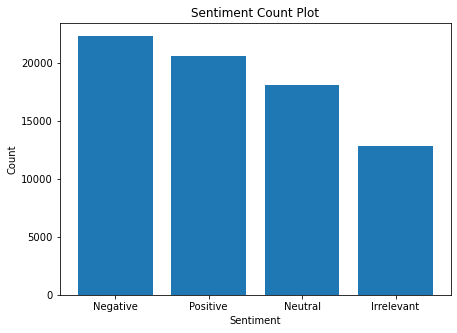

In [40]:
#Sentiments counts of training dataset
sentiment_counts =training_data['Sentiment'].value_counts()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the count plot using Matplotlib
ax.bar(sentiment_counts.index, sentiment_counts.values)

# Customize the plot
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Count Plot')

# Show the plot
plt.show()

From the above plot we can observe that negative sentiment impact was more followed by postive and neutral in training data.

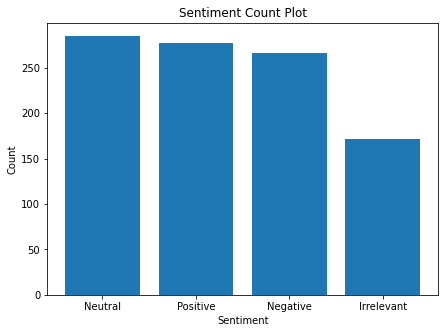

In [41]:
#Sentiment counts of Validation dataset
sentiment_counts =validation_data['Sentiment'].value_counts()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the count plot using Matplotlib
ax.bar(sentiment_counts.index, sentiment_counts.values)

# Customize the plot
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Count Plot')

# Show the plot
plt.show()

From the above plot we can observe that "Nuetral" sentiment impact was more followed by "postive" and "Negative" in Validation data

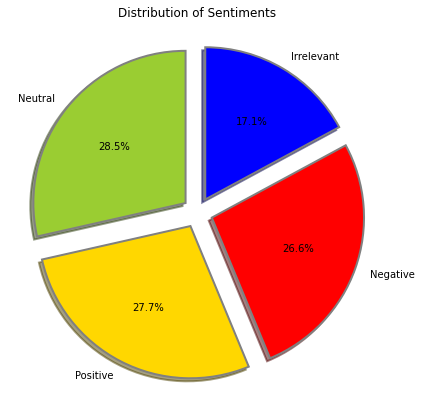

In [48]:
#Validation set pie chart
tags = validation_data['Sentiment'].value_counts()


# Colors for the pie chart wedges
colors = ("yellowgreen", "gold", "red","Blue")

# Wedge properties
wp = {'linewidth': 2, 'edgecolor': "grey"}

# Calculate the number of unique sentiment categories
num_categories = len(tags)

# Explode the wedges (separate a few slices)
explode = [0.1] * num_categories

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(tags, labels=tags.index, autopct='%1.1f%%', shadow=True,
        colors=colors, startangle=90, wedgeprops=wp, explode=explode)

# Set the title
plt.title('Distribution of Sentiments')

# Show the pie chart
plt.show()

From the above pie-chart Neutral sentiments was more compared to other in validation dataset.

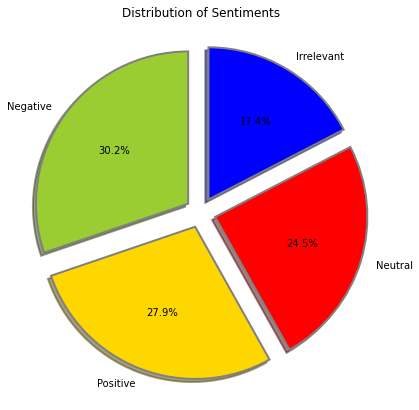

In [50]:
#Training dataset pie chart
tags = training_data['Sentiment'].value_counts()


# Colors for the pie chart wedges
colors = ("yellowgreen", "gold", "red","Blue")

# Wedge properties
wp = {'linewidth': 2, 'edgecolor': "grey"}

# Calculate the number of unique sentiment categories
num_categories = len(tags)

# Explode the wedges (separate a few slices)
explode = [0.1] * num_categories

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(tags, labels=tags.index, autopct='%1.1f%%', shadow=True,
        colors=colors, startangle=90, wedgeprops=wp, explode=explode)

# Set the title
plt.title('Distribution of Sentiments')

# Show the pie chart
plt.show()

From the above pie-chart "Negative" sentiments was more compared to other in Training dataset.

#### Splitting 

In [22]:
# spitting the data into x_train,y_train,x_test and y_test

x_train=training_data.Text
x_test=validation_data.Text
y_train=training_data.Sentiment
y_test=validation_data.Sentiment

In [23]:
x_train.shape,y_train.shape # shape of x and y train data

((73995,), (73995,))

In [24]:
x_test.shape,y_test.shape # shape of x and y test data

((999,), (999,))

#### Converting from text to vector from using TFidf Vectorization:

In [31]:
#Libraries for vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [27]:
#Text to vector form
tfidf_vectorizer = TfidfVectorizer() #Defining the vector fun
vec_train = tfidf_vectorizer.fit_transform(x_train)#Converting train data to vector form
vec_test = tfidf_vectorizer.transform(x_test)#converting test data to vector form


#### Model Building: 

Here,I had built the model by using the ensemble learning model called "Random forest classifier".

In [34]:
#Building the model
classifier = RandomForestClassifier() #Defining the model
classifier.fit(vec_train,y_train)#Fitting the model

RandomForestClassifier()

In [38]:
#Predicting the data using test data
y_pred = classifier.predict(vec_test)

In [39]:
#classification report
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.99      0.98      0.98       171
    Negative       0.96      0.97      0.97       266
     Neutral       0.97      0.95      0.96       285
    Positive       0.96      0.98      0.97       277

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



The model's high precision indicates that when it predicts a sentiment, it is usually correct. The high recall indicates that the model can identify most of the relevant instances in the dataset. The F1-score balances precision and recall, providing a single metric to evaluate the model's performance.

The accuracy was high so it is an best model to predict the sentiment.